# Pregunta 1

In [487]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import tree
import sys

In [488]:
%%file vertices2.csv
ID_Calle,ID_Interseccion,Costo
4827820,4827937,14
4827820,4828021,15
4827832,4827849,13
4827832,4827860,9
4827832,4827863,13
4827843,4827820,22
4827843,4827892,15
4827843,4827894,18
4827845,4827820,24
4827845,4827908,25
4827845,4827878,20
4827849,4827909,14
4827849,4827926,10
4827849,4827937,14
4827860,4827878,20
4827863,4827843,10
4827863,4827937,14
4827876,4827820,14
4827876,4827878,20
4827876,4827883,22
4827878,4827896,11
4827878,4827908,25
4827883,4827845,24
4827883,4827843,10
4827892,4827883,22
4827892,4827820,15
4827892,4827894,18
4827894,4827832,16
4827894,4827843,10
4827894,4827845,24
4827896,4827894,18
4827896,4828021,15
4827908,4827832,16
4827908,4827860,9
4827908,4828021,15
4827909,4827863,13
4827926,4827896,11
4827937,4827820,14
4827937,4827845,24
4828021,4827860,9
4828021,4827843,10
4828025,4828352,23
4828025,4827892,15
4828025,4827843,10
4828352,4827863,13
4828352,4827909,14

Overwriting vertices2.csv


In [489]:
%%file vertices_noid0.csv
inicio,final,costo
0,16,14
0,17,15
1,4,13
1,5,9
1,6,13
2,0,22
2,10,15
2,11,18
3,0,24
3,13,25
3,8,20
4,14,14
4,15,10
4,16,14
5,8,20
6,2,10
6,16,14
7,0,14
7,8,20
7,9,22
8,12,11
8,13,25
9,3,24
9,2,10
10,0,15
10,11,18
11,1,16
11,2,10
11,3,24
12,11,18
12,17,15
13,1,16
13,5,9
13,17,15
14,6,13
15,12,11
16,0,14
16,3,24
17,5,9
17,2,10
18,19,23
18,10,15
18,2,10
19,6,13
19,14,14

Overwriting vertices_noid0.csv


Arista 	Peso
4 1 	 13
17 2 	 10
8 3 	 20
16 4 	 14
1 5 	 9
2 6 	 10
0 7 	 14
12 8 	 11
2 9 	 10
0 10 	 15
2 11 	 18
15 12 	 11
5 13 	 9
6 14 	 13
4 15 	 10
0 16 	 14
5 17 	 9
2 18 	 10
6 19 	 13


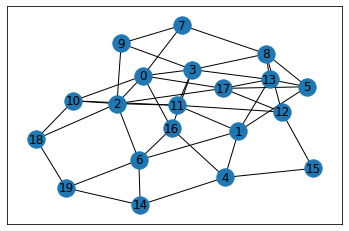

In [490]:
'''
def prim(grafo,n,s):
    v=[]
    while(len(v) != n):
        v.append(0)
    v[s]=1
    E=[]
    for i in range(0,n-1):
        minimo= 9999999
        agregar_vertice=0
        e=[]
        for j in range(0,n):
            if(v[j]==1):
                for k in range(0,n):
                    if(v[k]==0 and grafo[j][k]<minimo):
                        agregar_vertice=k
                        e=[j,k]
                        minimo=grafo[j][k]
                    
        v[agregar_vertice]=grafo[j][k]
        E.append(e)
    return E
'''

class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
    # Inicio de Prim
    def printMST(self, parent):
        print ("Arista \tPeso")
        for i in range(1, self.V):
            print (parent[i], i, "\t", self.graph[i][parent[i]])
    def minKey(self, key, mstSet):
        min = sys.maxsize
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
        return min_index
    def primMST(self):
        key = [sys.maxsize] * self.V
        parent = [None] * self.V
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1 # First node is always the root of
 
        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        parent[v] = u
        self.printMST(parent)
    #Fin Prim
    
    #Inicio Dijkstra
    
    #Fin Dijkstra
    
def leer_csv():
    datos=pd.read_csv('vertices_noid0.csv',header=0)
    idcalle=datos['inicio']
    idorigeninterseccion=datos['final']
    costo=datos['costo']
    matriz=[]
    for r in range(20):
        fila=[]
        for c in range(20):
            fila.append(0)
        matriz.append(fila)

    for i in range(0,45):
         matriz[idcalle[i]][idorigeninterseccion[i]]=costo[i]

    for i in range(0,45):
         matriz[idorigeninterseccion[i]][idcalle[i]]=costo[i]
        
    return matriz

def graficar(test2):
    pos=nx.spring_layout(test2)
    nx.draw_networkx(test2,pos)
    labels = nx.get_edge_attributes(test2,'weight')
    nx.draw_networkx_edge_labels(test2,pos,edge_labels=labels)

if __name__=="__main__":
    k = pd.read_csv('vertices_noid0.csv',header=0)
    test2=nx.from_pandas_edgelist(k,source='inicio',target='final',edge_attr='costo')
    matrix=leer_csv()
    graficar(test2)
    aux = Graph(20)
    aux.graph = matrix
    aux.primMST();    

In [395]:
def dijkstra(inicio,final):
    djk_path=nx.dijkstra_path(test2,inicio,final,weight=True)
    print(djk_path)
    ruta=test2.subgraph(djk_path)
    nx.draw(ruta,with_labels=True)

[19, 18, 2]


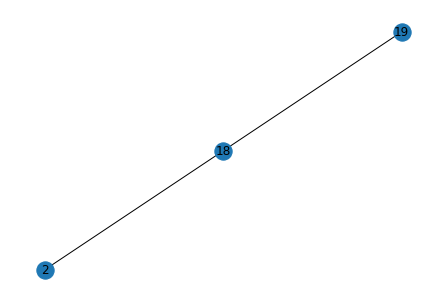

In [397]:
dijkstra(19,2)

[15, 4, 16, 3, 9]


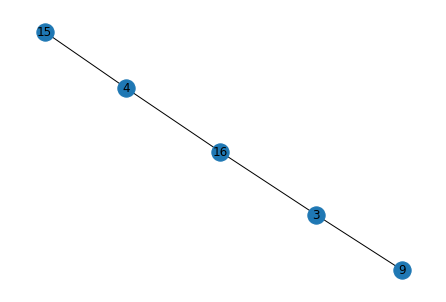

In [398]:
dijkstra(15,9)

[0, 16, 4, 14]


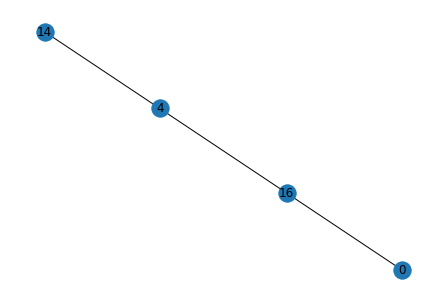

In [399]:
dijkstra(0,14)